<a href="https://colab.research.google.com/github/megasiska86/Neural-Network-Repository/blob/master/mobilenet(DO_DO%2BCLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [0]:
checkpoint = torch.load('dataset.pth')
trainset1 = checkpoint['trainset1']
validset = checkpoint['validset']
trainloader1 = checkpoint['trainloader1']
validloader =checkpoint['validloader']
testset = checkpoint['testset']
testloader =checkpoint['testloader']
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
model=models.mobilenet_v2(pretrained=True)
model.classifier[1]=nn.Linear(1280,10)
model=model.to(device)

#dropout classifier diubahdari 0.2-> 0.25

In [0]:
model.classifier[0]=nn.Dropout(p=0.25)

In [0]:
print(model)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_

In [0]:
optimizer=optim.SGD(model.parameters(), lr=0.01)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.NLLLoss()
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [0]:
mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []
train_acc_list=[]
test_acc_list=[]
start_epoch=0
e=5

In [0]:
for epoch in range(start_epoch,20):
    #exp_lr_scheduler.step()
    model.train()
    
    train_losses = []
    valid_losses = []
    model.eval()
    correct_t = 0
    total_t = 0
    for i, data in enumerate(trainloader1):
        images,labels=data
        images,labels=images.to(device),labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
        
        _, predicted_t = torch.max(outputs.data, 1)
        correct_t += (predicted_t == labels).sum().item()
        total_t += labels.size(0)
        
        if (i * 200) % (200 * 200) == 0:
            print(i*10, '/ 50000')
            
    model.eval()
    correct_v = 0
    total_v = 0
    with torch.no_grad():
        for i, data in enumerate(validloader):
            images,labels=data
            images,labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            valid_losses.append(loss.item())
            
            _, predicted_v = torch.max(outputs.data, 1)
            correct_v += (predicted_v == labels).sum().item()
            total_v += labels.size(0)
    correct_te = 0
    total_te = 0
    with torch.no_grad():
        for i, data in enumerate(testloader):
            images,labels=data
            images,labels=images.to(device),labels.to(device)
            outputs = model(images)
            _, predicted_v = torch.max(outputs.data, 1)
            correct_te += (predicted_v == labels).sum().item()
            total_te += labels.size(0)
    accuracy_te = 100*correct_te/total_te
    test_acc_list.append(accuracy_te)
                
    m_t_l=np.mean(train_losses)
    m_v_l=np.mean(valid_losses)
            
    mean_train_losses.append(m_t_l)
    mean_valid_losses.append(m_v_l)
    
    accuracy_v = 100*correct_v/total_v
    accuracy_t = 100*correct_t/total_t
    valid_acc_list.append(accuracy_v)
    train_acc_list.append(accuracy_t)
    
    
        #save
    torch.save({'epoch': epoch+1, 'model_state_dict': model.state_dict(),'optimizer_state_dict': optimizer.state_dict(), 'train loss': mean_train_losses,'train acc': train_acc_list, 'valid loss':mean_valid_losses, 'valid acc': valid_acc_list}, 'mo2.pth')
    print('epoch : {}, train loss : {:.4f}, train acc : {:.2f}% valid loss : {:.4f}, valid acc : {:.2f}%, test acc : {:.2f}%'.format(epoch+1, m_t_l, accuracy_t, m_v_l, accuracy_v, accuracy_te))
print('best val acc: {0}, best train loss: {1}, test acc max: {2}'.format(np.max(valid_acc_list),np.min(mean_train_losses),np.max(test_acc_list)))

0 / 50000
2000 / 50000
epoch : 12, train loss : 0.0504, train acc : 98.26% valid loss : 0.1477, valid acc : 95.12%, test acc : 93.77%
0 / 50000
2000 / 50000
epoch : 13, train loss : 0.0447, train acc : 98.42% valid loss : 0.1608, valid acc : 94.66%, test acc : 93.84%
0 / 50000
2000 / 50000
epoch : 14, train loss : 0.0400, train acc : 98.63% valid loss : 0.1725, valid acc : 94.69%, test acc : 93.83%
0 / 50000
2000 / 50000
epoch : 15, train loss : 0.0360, train acc : 98.73% valid loss : 0.1550, valid acc : 95.21%, test acc : 94.33%
0 / 50000
2000 / 50000
epoch : 16, train loss : 0.0314, train acc : 98.95% valid loss : 0.1763, valid acc : 94.55%, test acc : 93.66%
0 / 50000
2000 / 50000
epoch : 17, train loss : 0.0267, train acc : 99.16% valid loss : 0.1768, valid acc : 94.96%, test acc : 93.98%
0 / 50000
2000 / 50000
epoch : 18, train loss : 0.0235, train acc : 99.27% valid loss : 0.1831, valid acc : 94.98%, test acc : 93.98%
0 / 50000
2000 / 50000
epoch : 19, train loss : 0.0170, train 

In [0]:
checkpoint = torch.load('mo2.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch']
mean_train_losses = checkpoint['train loss']
train_acc_list=checkpoint['train acc']
mean_valid_losses = checkpoint['valid loss']
valid_acc_list=checkpoint['valid acc']

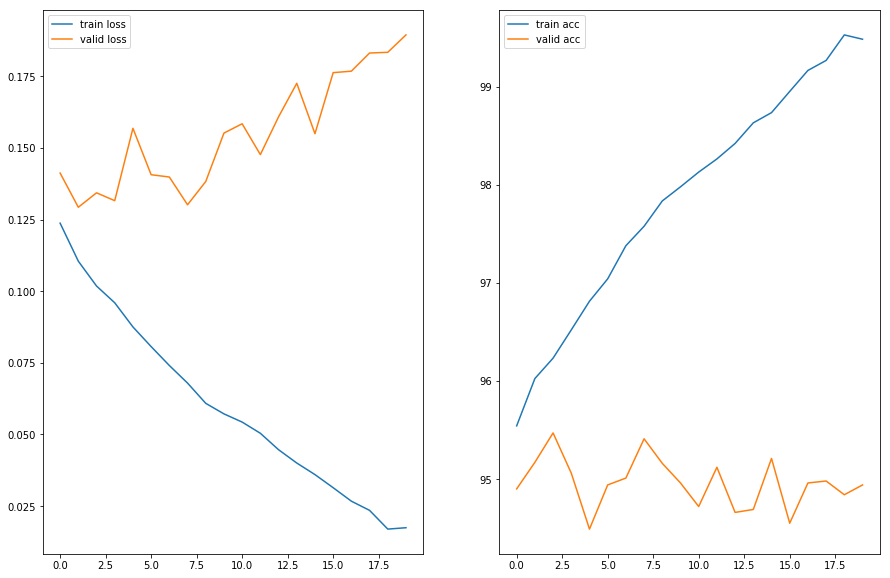

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.plot(mean_train_losses, label='train loss')
ax1.plot(mean_valid_losses, label='valid loss')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')
ax2.plot(train_acc_list, label='train acc')
ax2.plot(valid_acc_list, label='valid acc')
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='best')

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/dataset.pth' '/content/dataset.pth'

#DO+CLR base_lr=0.001, max_lr=0.015,step_size_up=60, step_size_down=100

In [0]:
optimizer2=optim.SGD(model.parameters(), lr=0.1, momentum=0.99)
#optimizer1 = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn2 = nn.CrossEntropyLoss()
scheduler2 = lr_scheduler.CyclicLR(optimizer2, base_lr=0.001, max_lr=0.015,step_size_up=60, step_size_down=100)
#loss_fn1 = nn.NLLLoss()
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer1, step_size=10, gamma=0.1)

In [0]:
mean_train_losses2 = []
mean_valid_losses2 = []
valid_acc_list2 = []
train_acc_list2=[]
test_acc_list2=[]
start_epoch2=0
e2=5

In [0]:
for epoch in range(start_epoch2,10):
    scheduler2.step()
    model.train()
    
    train_losses = []
    valid_losses = []
    model.eval()
    correct_t = 0
    total_t = 0
    for i, data in enumerate(trainloader1):
        images,labels=data
        images,labels=images.to(device),labels.to(device)
        
        optimizer2.zero_grad()
        
        outputs = model(images)
        loss = loss_fn2(outputs, labels)
        loss.backward()
        optimizer2.step()
        
        train_losses.append(loss.item())
        
        _, predicted_t = torch.max(outputs.data, 1)
        correct_t += (predicted_t == labels).sum().item()
        total_t += labels.size(0)
        
        if (i * 200) % (200 * 200) == 0:
            print(i*10, '/ 50000')
            
    model.eval()
    correct_v = 0
    total_v = 0
    with torch.no_grad():
        for i, data in enumerate(validloader):
            images,labels=data
            images,labels=images.to(device),labels.to(device)
            outputs = model(images)
            loss = loss_fn2(outputs, labels)
            
            valid_losses.append(loss.item())
            
            _, predicted_v = torch.max(outputs.data, 1)
            correct_v += (predicted_v == labels).sum().item()
            total_v += labels.size(0)
    correct_te = 0
    total_te = 0
    with torch.no_grad():
        for i, data in enumerate(testloader):
            images,labels=data
            images,labels=images.to(device),labels.to(device)
            outputs = model(images)
            _, predicted_v = torch.max(outputs.data, 1)
            correct_te += (predicted_v == labels).sum().item()
            total_te += labels.size(0)
    accuracy_te = 100*correct_te/total_te
    test_acc_list2.append(accuracy_te)
                
    m_t_l=np.mean(train_losses)
    m_v_l=np.mean(valid_losses)
            
    mean_train_losses2.append(m_t_l)
    mean_valid_losses2.append(m_v_l)
    
    accuracy_v = 100*correct_v/total_v
    accuracy_t = 100*correct_t/total_t
    valid_acc_list2.append(accuracy_v)
    train_acc_list2.append(accuracy_t)
    
    
        #save
    torch.save({'epoch': epoch+1, 'model_state_dict': model.state_dict(),'optimizer_state_dict': optimizer2.state_dict(), 'train loss': mean_train_losses2,'train acc': train_acc_list2, 'valid loss':mean_valid_losses2, 'valid acc': valid_acc_list2}, 'modoc.pth')
    print('epoch : {}, train loss : {:.4f}, train acc : {:.2f}% valid loss : {:.4f}, valid acc : {:.2f}%, test acc : {:.2f}%'.format(epoch+1, m_t_l, accuracy_t, m_v_l, accuracy_v, accuracy_te))
print('best val acc: {0}, best train loss: {1}, test acc max: {2}'.format(np.max(valid_acc_list2),np.min(mean_train_losses2),np.max(test_acc_list2)))

0 / 50000
2000 / 50000
epoch : 6, train loss : 0.0031, train acc : 99.94% valid loss : 0.2804, valid acc : 94.76%, test acc : 94.76%
0 / 50000
2000 / 50000
epoch : 7, train loss : 0.0020, train acc : 99.97% valid loss : 0.2887, valid acc : 94.85%, test acc : 94.70%
0 / 50000
2000 / 50000
epoch : 8, train loss : 0.0020, train acc : 99.95% valid loss : 0.3041, valid acc : 94.64%, test acc : 94.60%
0 / 50000
2000 / 50000
epoch : 9, train loss : 0.0198, train acc : 99.30% valid loss : 0.2594, valid acc : 94.86%, test acc : 94.58%
0 / 50000
2000 / 50000
epoch : 10, train loss : 0.0160, train acc : 99.39% valid loss : 0.2545, valid acc : 94.73%, test acc : 94.46%
best val acc: 95.0, best train loss: 0.0019687214185057393, test acc max: 94.97


In [0]:
checkpoint = torch.load('modoc.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer2.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch2 = checkpoint['epoch']
mean_train_losses2 = checkpoint['train loss']
train_acc_list2=checkpoint['train acc']
mean_valid_losses2 = checkpoint['valid loss']
valid_acc_list2=checkpoint['valid acc']

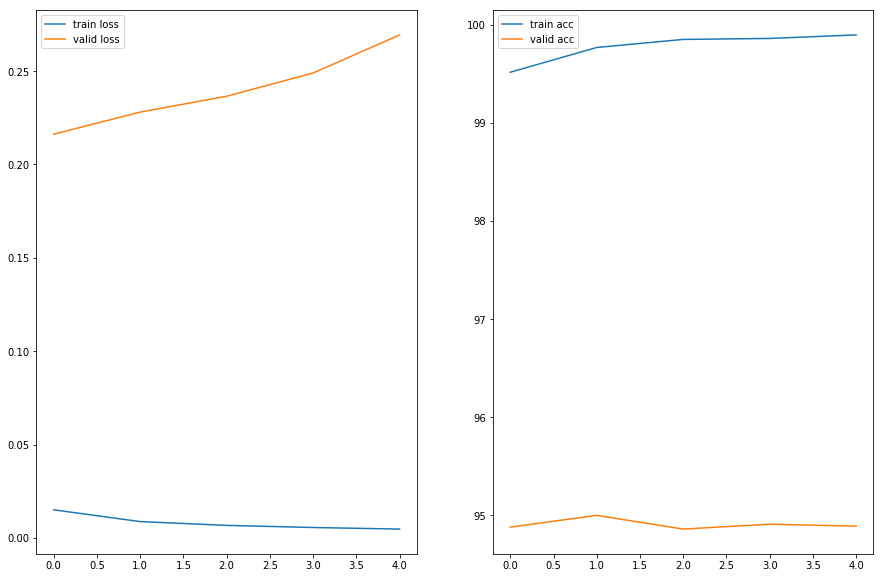

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.plot(mean_train_losses2, label='train loss')
ax1.plot(mean_valid_losses2, label='valid loss')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')
ax2.plot(train_acc_list2, label='train acc')
ax2.plot(valid_acc_list2, label='valid acc')
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, labels, loc='best')

In [0]:
!cp '/content/dataset.pth' '/content/drive/My Drive/dataset.pth'

In [0]:
!cp '/content/mo2.pth' '/content/drive/My Drive/mo.pth'

In [0]:
!cp '/content/modoc.pth' '/content/drive/My Drive/modoc.pth'